# Оценка стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

Данные находятся в файле `/datasets/autos.csv`

Признаки:

* **DateCrawled** — дата скачивания анкеты из базы
* **VehicleType** — тип автомобильного кузова
* **RegistrationYear** — год регистрации автомобиля
* **Gearbox** — тип коробки передач
* **Power** — мощность (л. с.)
* **Model** — модель автомобиля
* **Kilometer** — пробег (км)
* **RegistrationMonth** — месяц регистрации автомобиля
* **FuelType** — тип топлива
* **Brand** — марка автомобиля
* **Repaired** — была машина в ремонте или нет
* **DateCreated** — дата создания анкеты
* **NumberOfPictures** — количество фотографий автомобиля
* **PostalCode** — почтовый индекс владельца анкеты (пользователя)
* **LastSeen** — дата последней активности пользователя

<h1>План работы<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Установим-необходимые-библиотеки" data-toc-modified-id="Установим-необходимые-библиотеки-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Установим необходимые библиотеки</a></span></li><li><span><a href="#Импортируем-необходимые-библиотеки" data-toc-modified-id="Импортируем-необходимые-библиотеки-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Импортируем необходимые библиотеки</a></span></li><li><span><a href="#Используемые-в-проекте-функции" data-toc-modified-id="Используемые-в-проекте-функции-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Используемые в проекте функции</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузим-данные" data-toc-modified-id="Загрузим-данные-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Загрузим данные</a></span></li><li><span><a href="#Проверим-соответствие-данных-описанию" data-toc-modified-id="Проверим-соответствие-данных-описанию-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Проверим соответствие данных описанию</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Заполним-пропущенные-значения" data-toc-modified-id="Заполним-пропущенные-значения-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Заполним пропущенные значения</a></span></li><li><span><a href="#Обработаем-аномалии-в-столбцах" data-toc-modified-id="Обработаем-аномалии-в-столбцах-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Обработаем аномалии в столбцах</a></span></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Корреляционный анализ</a></span></li><li><span><a href="#Подготовим-выборки-для-обучения-моделей" data-toc-modified-id="Подготовим-выборки-для-обучения-моделей-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Подготовим выборки для обучения моделей</a></span></li></ul></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span></li></ul></div>

### Установим необходимые библиотеки

In [1]:
!pip install phik -q 

In [2]:
!pip install --upgrade scikit-learn -q

In [3]:
!pip install lightgbm -q

### Импортируем необходимые библиотеки

In [4]:
# Импортируем библиотеки
import pandas as pd
import re
import os
import seaborn as sns
import matplotlib.pyplot as plt
import time
from matplotlib.patches import Patch
import numpy as np
from scipy import stats as st
from phik import phik_matrix
from phik.report import plot_correlation_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    OneHotEncoder, 
    MinMaxScaler 
)
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    mean_squared_error 
)
from sklearn.model_selection import (
    train_test_split, 
    cross_val_score, 
    RandomizedSearchCV 
)
from sklearn.linear_model import (
    LinearRegression 
)
from sklearn.ensemble import (
    RandomForestRegressor
)
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# задаём значение констант
RANDOM_STATE = 42 
TEST_SIZE = 0.25 

# задаём стиль для графиков
sns.set_style("darkgrid")

# игнорируем предупреждения
import warnings
warnings.simplefilter("ignore")

### Используемые в проекте функции

In [5]:
def rename_columns(df):
    '''
    Функция для переименования колонок.
    Функция rename_columns принимает на вход DataFrame df и переименовывает колонки,
    добавляя символ '_' перед новыми словами, начинающимися с заглавной буквы, и переводя все буквы в нижний регистр.

    Parameters:
    df (DataFrame): Исходный DataFrame, в котором требуется переименовать колонки.

    Returns:
    DataFrame: DataFrame с переименованными колонками.
    '''
    def rename_column(col):
        # Преобразование имени колонки
        new_col = re.sub(r'([a-z])([A-Z])', r'\1_\2', col)  # Добавить '_' перед новыми словами
        new_col = new_col.lower()  # Преобразовать в нижний регистр
        return new_col
    
    df.columns = [rename_column(col) for col in df.columns]
    return df

In [6]:
def df_unique(df):
    '''
    Функция для проверки наличия неявных дубликатов в данных.
    Функция df_unique принимает на вход DataFrame df и выводит список уникальных значений
    для каждого столбца типа 'object', отсортированных по возрастанию.

    Parameters:
    df (DataFrame): Исходный DataFrame, для которого требуется вывести список уникальных значений
                   для столбцов типа 'object'.

    Returns:
    None: Функция не возвращает значений, она лишь выводит список уникальных значений
    в столбцах типа 'object'.
    '''
    # выбираем столбцы типа 'object'
    object_columns = df.select_dtypes(include=['object'])

    # выводим список уникальных значений для этих столбцов
    for column in object_columns.columns:
        unique_values = sorted(object_columns[column].astype(str).unique())
        print(f'Список уникальных значений в столбце {column}:')
        for value in unique_values:
            print(value)
        print()

In [7]:
def visualize_data(df_, dis__columns=None, target=None):
    '''
    Функция строит гистограммы для числовых столбцов,
    график подсчета для дискретных и 
    countplot для категориальных столбцов, выводит описательную статистику.
    Принимает на вход DataFrame df.

    Parameters:
    - df (DataFrame): Исходный DataFrame, для которого требуется построить графики.
    - target (str): Имя целевого столбца. По умолчанию None.
    - dis_columns (list): Список дискретных (категориальных) столбцов. По умолчанию None.

    Returns:
    None: Функция не возвращает значений, она лишь строит графики для указанных столбцов.
    '''
    # Проверка наличия данных
    if df_.empty:
        print("Ошибка: DataFrame пуст.")
        return
    
    name = getattr(df_, "name", "df")
    
    # Обработка NaN значений
    df = df_.dropna()
    
    unique_targets = None
    # Получение числовых столбцов
    num_cols = df.select_dtypes(include=np.number).columns.tolist()
    
    # Исключение столбца 'id', если он есть
    if 'id' in num_cols:
        num_cols.remove('id')
    del_l = []
    del_ = []

    # Удаление dis_column, если её нет в num_cols
    if dis__columns:
        for col in dis_columns:
            if col not in num_cols:
                del_l.append(col)
    if del_l:
        for col in del_l:
            dis_columns.remove(col)
            
    # Удаление num_col, если она есть в dis_columns
    if num_cols:
        for col in num_cols:
            if col in dis_columns:
                del_.append(col)
    if del_:
        for col in del_:
            num_cols.remove(col)
    
    # Получение категориальных столбцов
    cat_cols = df.select_dtypes(include='object').columns
    
    # Подсчет количества числовых и категориальных столбцов
    num_col_count = len(num_cols)
    cat_col_count = len(cat_cols)
    total_plots = num_col_count + cat_col_count
    
    # Вычисление количества строк и столбцов для subplot
    num_rows = total_plots // 2
    num_cols_subplot = 2
    if total_plots % 2 != 0:
        num_rows += 1
    
    # Создание subplot
    fig, axs = plt.subplots(num_rows, num_cols_subplot, figsize=(12, num_rows * 6))
    axs = axs.flatten()
    
    plot_idx = 0

    # Построение гистограмм для числовых столбцов
    for col in num_cols:
        ax = axs[plot_idx]

        if target and target in df.columns:
            # Определение цветов для уникальных значений целевого столбца
            unique_targets = df[target].unique()
            color_palette = sns.color_palette('husl', len(unique_targets))
            color_dict = {target_value: color for target_value, color in zip(unique_targets, color_palette)}

            sns.kdeplot(data=df, x=col, hue=target, ax=ax, legend=True, palette=color_palette, common_norm=False)
            ax.axvline(x=df[col].mean(), color='r', linestyle='--', label=f'Среднее ({df[col].mean():.2f})')
            ax.axvline(x=df[col].median(), color='g', linestyle='--', label=f'Медиана ({df[col].median():.2f})')
            handles, labels = ax.get_legend_handles_labels()

            # Добавление меток для значений целевого столбца в легенду
            handles.extend([Patch(color=color_dict[label], label=label) for label in unique_targets])
            labels.extend(unique_targets)

            ax.legend(handles=handles, labels=labels)
        else:
            sns.kdeplot(data=df, x=col, ax=ax)
            ax.axvline(x=df[col].mean(), color='r', linestyle='--', label=f'Среднее ({df[col].mean():.2f})')
            ax.axvline(x=df[col].median(), color='g', linestyle='--', label=f'Медиана ({df[col].median():.2f})')
            ax.legend()

        ax.set_ylabel("Плотность распределения")
        ax.set_title(f'Распределение {col}')
        plot_idx += 1

    # Построение countplot для дискретных столбцов
    if dis_columns:
        for col in dis_columns:
            if plot_idx < len(axs):
                ax = axs[plot_idx]
                sns.countplot(data=df, x=col, ax=ax, palette='Blues_d')
                ax.set_title(f'График подсчёта {col}')
                plot_idx += 1

    # Построение Pie диаграмм для категориальных столбцов
    for col in cat_cols:
        if plot_idx < len(axs):
            ax = axs[plot_idx]
            df[col].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', ylabel='', colors=sns.color_palette('Blues_d'))
            ax.set_title(f'Pie диаграмма {col}')
            plot_idx += 1
            
    # Проверяем, остались ли лишние subplot
    if plot_idx < len(axs):
        for i in range(plot_idx, len(axs)):
            fig.delaxes(axs[i])
    
    # Добавление дополнительной информации
    plt.suptitle(f'Графики для {name}', fontsize=14)
    
    # Управление макетом
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    
    # Отображение графиков
    plt.show()
    
    # Вывод описательной статистики
    cols = num_cols+dis_columns
    if cols:
        print('Описательная статистика для признаков:', name)
        display(df[cols].describe().T)

In [8]:
def info_func(df, dis_columns=None):
    '''
    Функция для просмотра характеристик датафреймов,
    проверки наличия пропусков и дубликатов в данных.
    Функция info_func принимает на вход DataFrame df и выводит первые несколько строк 
    этого DataFrame, а также общую информацию о нем, количество пустых значений
    и количество явных дубликатов в этом DataFrame.

    Parameters:
    df (DataFrame): Исходный DataFrame, для которого требуется вывести информацию.
    dis_columns (list): Список дискретных (категориальных) столбцов. По умолчанию None.

    Returns:
    None: Функция не возвращает значений, она лишь выводит информацию о DataFrame.
    '''
    print('-'*22, 'Исходный датафрейм', df.name, '-'*22)
    display(df.head())
    print('')
    print('')
    print('-'*12, 'Общая информация о датафрейме', df.name, '-'*12)
    print('')
    print('')
    display(df.info())
    
    print('-'*10, 'Количество пустых значений в датафрейме', df.name, '-'*10)
    print('')
    print('')
    display(df.isna().sum())
    print('-'*10, 'Количество явных дубликатов в датафрейме', df.name, '-'*10)
    display(df.duplicated().sum())
    
    df_unique(df)
    
    print('-'*10, 'Графики распределения признаков датафрейма', df.name, '-'*10)
    visualize_data(df, dis_columns)

## Подготовка данных

### Загрузка данных

#### Загрузим данные

Считаем CSV-файлы в датафреймы

In [9]:
local_path = '/datasets/'
online_path = 'https://xxx/datasets/'

file_name = 'autos.csv'

dfs = []

# Чтение файлов и создание датафреймов
local_file_path = os.path.join(local_path, file_name)
online_file_path = online_path + file_name
df_name = file_name.split('.')[0]  # Получение имени датафрейма из имени файла

try:
    if os.path.exists(local_file_path):
        df = pd.read_csv(local_file_path, parse_dates=['DateCrawled', 'DateCreated', 'LastSeen'])
        print(f"Данные загружены из локальной директории: {file_name}")
    else:
        df = pd.read_csv(online_file_path, parse_dates=['DateCrawled', 'DateCreated', 'LastSeen'])
        print(f"Данные загружены из сети: {file_name}")

    globals()[df_name] = df
    df.name = df_name
    dfs.append(df)
except Exception as e:
    print(f"Произошла ошибка при чтении файла {file_name}: {e}")

Данные загружены из локальной директории: autos.csv


In [10]:
# задаём целевой признак
target = 'Price'

#### Проверим соответствие данных описанию

Переименуем столбцы в соответствии с рекомендациями PEP 8

In [11]:
# Переименование колонок
autos = rename_columns(autos)

Применим к датафрейму функцию `info_func`

In [12]:
# Зададим дискретные признаки
dis_columns = ['registration_year', 'registration_month', 'number_of_pictures', 'postal_code']

---------------------- Исходный датафрейм autos ----------------------


,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,number_of_pictures,postal_code,last_seen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21




------------ Общая информация о датафрейме autos ------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        354369 non-null  datetime64[ns]
 1   price               354369 non-null  int64         
 2   vehicle_type        316879 non-null  object        
 3   registration_year   354369 non-null  int64         
 4   gearbox             334536 non-null  object        
 5   power               354369 non-null  int64         
 6   model               334664 non-null  object        
 7   kilometer           354369 non-null  int64         
 8   registration_month  354369 non-null  int64         
 9   fuel_type           321474 non-null  object        
 10  brand               354369 non-null  object        
 11  repaired            283215 non-null  object        
 12  date_created        

None

---------- Количество пустых значений в датафрейме autos ----------




date_crawled              0
price                     0
vehicle_type          37490
registration_year         0
gearbox               19833
power                     0
model                 19705
kilometer                 0
registration_month        0
fuel_type             32895
brand                     0
repaired              71154
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
dtype: int64

---------- Количество явных дубликатов в датафрейме autos ----------


4

Список уникальных значений в столбце vehicle_type:
bus
convertible
coupe
nan
other
sedan
small
suv
wagon

Список уникальных значений в столбце gearbox:
auto
manual
nan

Список уникальных значений в столбце model:
100
145
147
156
159
1_reihe
1er
200
2_reihe
300c
3_reihe
3er
4_reihe
500
5_reihe
5er
601
6_reihe
6er
7er
80
850
90
900
9000
911
a1
a2
a3
a4
a5
a6
a8
a_klasse
accord
agila
alhambra
almera
altea
amarok
antara
arosa
astra
auris
avensis
aveo
aygo
b_klasse
b_max
beetle
berlingo
bora
boxster
bravo
c1
c2
c3
c4
c5
c_klasse
c_max
c_reihe
caddy
calibra
captiva
carisma
carnival
cayenne
cc
ceed
charade
cherokee
citigo
civic
cl
clio
clk
clubman
colt
combo
cooper
cordoba
corolla
corsa
cr_reihe
croma
crossfire
cuore
cx_reihe
defender
delta
discovery
doblo
ducato
duster
e_klasse
elefantino
eos
escort
espace
exeo
fabia
fiesta
focus
forester
forfour
fortwo
fox
freelander
fusion
g_klasse
galant
galaxy
getz
gl
glk
golf
grand
i3
i_reihe
ibiza
impreza
insignia
jazz
jetta
jimny
juke
justy
ka
kadett


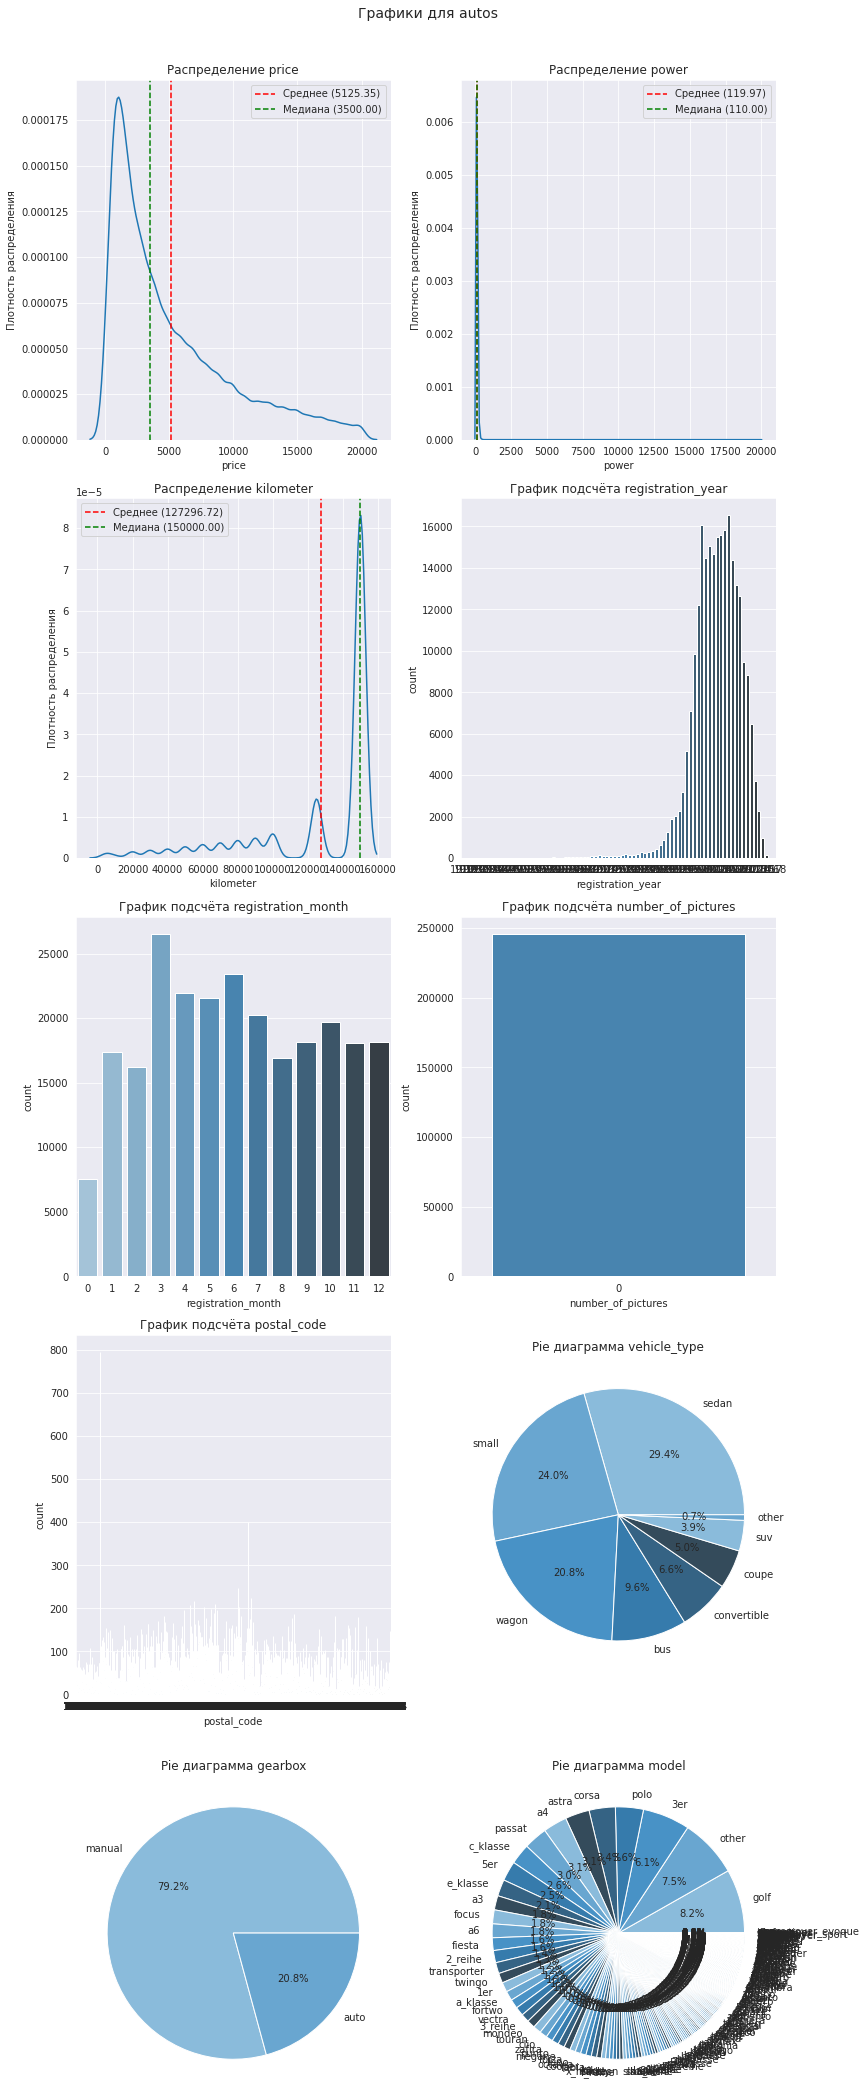

Описательная статистика для признаков: autos


,count,mean,std,min,25%,50%,75%,max
price,245814.0,5125.346717,4717.948673,0.0,1499.0,3500.0,7500.0,20000.0
power,245814.0,119.970884,139.387116,0.0,75.0,110.0,150.0,20000.0
kilometer,245814.0,127296.716216,37078.820368,5000.0,125000.0,150000.0,150000.0,150000.0
registration_year,245814.0,2002.918699,6.163765,1910.0,1999.0,2003.0,2007.0,2018.0
registration_month,245814.0,6.179701,3.479519,0.0,3.0,6.0,9.0,12.0
number_of_pictures,245814.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
postal_code,245814.0,51463.186002,25838.058847,1067.0,30966.0,50769.0,72379.0,99998.0


In [13]:
info_func(autos, dis_columns)

* Датафрейм содержит 354 369 строк, данные соответствуют описанию
* Присутствуют пропущенные значения в столбцах:
 * `vehicle_type`          37 490
 * `gearbox`               19 833
 * `model`                 19 705
 * `fuel_type`             32 895
 * `repaired`              71 154
* Присутствуют 4 явных дубликата
* В данных встречаются аномалии:
 * год регистрации автомобиля `registration_year` встречается от 1 000 до 9 999 года, хотя первый в мире автомобиль, был разработан и зарегистрирован Карлом Бенцем 29 января 1886 года, а до 9 999 года нам ещё далеко.
 * встречается нулевая цена `price`
 * мощность (л.с.) `power` от 0 до 20 000, хотя самым мощным серийным автомобилем в мире считается  Dagger GT, мощностью 2 028 лошадиных сил.
 * присутствует нулевой месяц регистрации автомобиля `registration_month`
* Для всех автомобилей отсутствуют фотографии, `number_of_pictures=0`, можно удалить этот признак как неинформативный

### Подготовка данных

#### Заполним пропущенные значения

Заполним пропущенные значения "заглушкой" - `unknown`

In [15]:
autos = autos.fillna('unknown')

#### Обработаем аномалии в столбцах

Посмотрим значение цены 5 квантиля

In [16]:
autos.price.quantile(0.05)

200.0

Оставим только машины, цена на которые больше 350

In [17]:
autos = autos.query('price > 350')

Найдём дату внесения последнего автомобиля в базу данных

In [18]:
autos.date_created.max()

Timestamp('2016-04-07 00:00:00')

In [19]:
autos.registration_year.quantile(0.001)

1960.0

In [20]:
# Вычисление долей
total_cars = len(autos)
before_1966_ratio = len(autos[autos['registration_year'] < 1966]) / total_cars
after_2016_ratio = len(autos[autos['registration_year'] > 2016]) / total_cars

print(f"Доля автомобилей, выпущенных до 1966 года: {before_1966_ratio:.5f}")
print(f"Доля автомобилей, выпущенных после 2016 года: {after_2016_ratio:.5f}")

Доля автомобилей, выпущенных до 1966 года: 0.00199
Доля автомобилей, выпущенных после 2016 года: 0.04094


Оставим в датасете только автомобили зарегистрированные в промежутке между 1966 и 2016 годами

In [21]:
autos_c = autos.query('registration_year >= 1966 & registration_year < 2017')

Первый массовый серийный автомобиль OldsmobileCurvedDash обладал мощностью 5 л.с.

Найдём мощность двигателя для 99.9 квантиля

In [22]:
autos.power.quantile(0.999)

602.4870000000228

In [23]:
# Вычисление долей
total_cars = len(autos)
before_5_ratio = len(autos[autos['power'] < 5]) / total_cars
after_602_ratio = len(autos[autos['power'] > 602]) / total_cars

print(f"Доля автомобилей с мощностью двигателя до 5 л.с.: {before_5_ratio:.4f}")
print(f"Доля автомобилей с мощнеостью двигателя более 602 л.с.: {after_602_ratio:.4f}")

Доля автомобилей с мощностью двигателя до 5 л.с.: 0.0938
Доля автомобилей с мощнеостью двигателя более 602 л.с.: 0.0010


Оставим в датасете только автомобили с мощнностью двигателя от 5 до 602 лошадиных сил

In [24]:
autos_c = autos_c.query('power > 5 and power < 602')

#### Корреляционный анализ

Не все наши признаки имеют нормальное распределение и часть признаков является категориальными, используем библиотеку phik для рассчёта корреляции между признаками разных типов данных

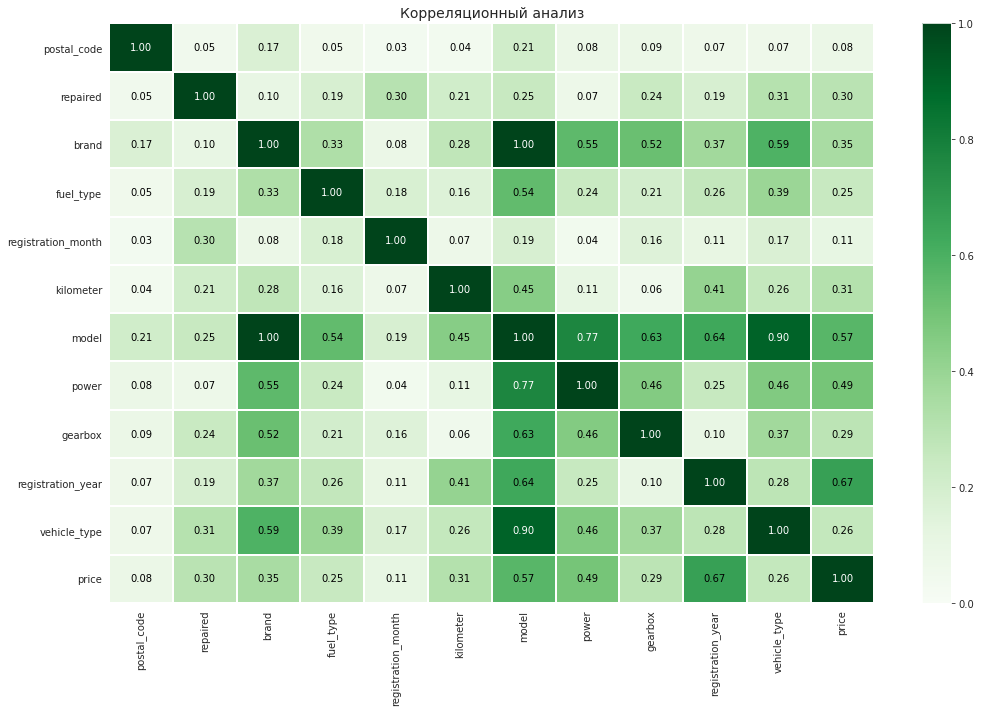

In [26]:
# Создаём список с количественными признаками
interval_cols = [
    'price',
    'registration_year',
    'power',
    'kilometer',
    'registration month',
    'postal_code'
]

# Считаем корреляцию и строим матрицу

phik_overview = phik_matrix(autos_c.drop(['date_crawled', 
                                          'date_created', 
                                          'last_seen', 
                                          'number_of_pictures'], 
                                         axis=1), 
                            interval_cols=interval_cols)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'Корреляционный анализ',
    fontsize_factor=1,
    figsize=(15, 10),
)

In [27]:
print('Список признаков в матрице корреляции:\n')
for col in autos_c:
    print(col)

Список признаков в матрице корреляции:

date_crawled
price
vehicle_type
registration_year
gearbox
power
model
kilometer
registration_month
fuel_type
brand
repaired
date_created
number_of_pictures
postal_code
last_seen


* Больше всего с целевым признаком корелируют: `registration_year`, `model`, `power`, они окажут большее влияние на модель
* Меньше всего корелируют: `postal_code`, `registration_month`, они окажут минимальноее влияние на модель.
* Мультиколлинеарность проявляется при значении кооэффициента корреляции от 0.9, в нашем случае `model` имеет очень высокую корреляцию с `brand`(1) и `vehicle_type` (0.9)

* Для обучения модели не будем использовать следующие признаки:
 * как неинформативные:
  * `number_of_pictures`
  * `date_crawled`
  * `date_created`
  * `last_seen`
 * вызывающие мультиколлинеарность:
  * `brand`
  * `vehicle_type`
 * обладающие слабой корреляцией с целевым признаком:
  * `postal_code`
  * `registration_month`

In [28]:
non_inf_features = ['number_of_pictures', 
                    'brand', 
                    'vehicle_type',
                    'date_crawled',
                    'date_created',
                    'last_seen', 
                    'postal_code', 
                    'registration_month']

#### Подготовим выборки для обучения моделей

Удалим неинформативные и вызывающие мультиколлинеарность признаки

In [29]:
autos_c = autos_c.drop(non_inf_features, axis=1)

Проверим наличие дубликатов

In [30]:
autos_c.duplicated().sum()

45289

Удалим дубликаты

In [31]:
autos_c.drop_duplicates(inplace=True)

---------------------- Исходный датафрейм autos_c ----------------------


,price,registration_year,gearbox,power,model,kilometer,fuel_type,repaired
1,18300,2011,manual,190,unknown,125000,gasoline,yes
2,9800,2004,auto,163,grand,125000,gasoline,unknown
3,1500,2001,manual,75,golf,150000,petrol,no
4,3600,2008,manual,69,fabia,90000,gasoline,no
5,650,1995,manual,102,3er,150000,petrol,yes




------------ Общая информация о датафрейме autos_c ------------


<class 'pandas.core.frame.DataFrame'>
Int64Index: 238859 entries, 1 to 354368
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              238859 non-null  int64 
 1   registration_year  238859 non-null  int64 
 2   gearbox            238859 non-null  object
 3   power              238859 non-null  int64 
 4   model              238859 non-null  object
 5   kilometer          238859 non-null  int64 
 6   fuel_type          238859 non-null  object
 7   repaired           238859 non-null  object
dtypes: int64(4), object(4)
memory usage: 16.4+ MB


None

---------- Количество пустых значений в датафрейме autos_c ----------




price                0
registration_year    0
gearbox              0
power                0
model                0
kilometer            0
fuel_type            0
repaired             0
dtype: int64

---------- Количество явных дубликатов в датафрейме autos_c ----------


0

Список уникальных значений в столбце gearbox:
auto
manual
unknown

Список уникальных значений в столбце model:
100
145
147
156
159
1_reihe
1er
200
2_reihe
300c
3_reihe
3er
4_reihe
500
5_reihe
5er
601
6_reihe
6er
7er
80
850
90
900
9000
911
a1
a2
a3
a4
a5
a6
a8
a_klasse
accord
agila
alhambra
almera
altea
amarok
antara
arosa
astra
auris
avensis
aveo
aygo
b_klasse
b_max
beetle
berlingo
bora
boxster
bravo
c1
c2
c3
c4
c5
c_klasse
c_max
c_reihe
caddy
calibra
captiva
carisma
carnival
cayenne
cc
ceed
charade
cherokee
citigo
civic
cl
clio
clk
clubman
colt
combo
cooper
cordoba
corolla
corsa
cr_reihe
croma
crossfire
cuore
cx_reihe
defender
delta
discovery
doblo
ducato
duster
e_klasse
elefantino
eos
escort
espace
exeo
fabia
fiesta
focus
forester
forfour
fortwo
fox
freelander
fusion
g_klasse
galant
galaxy
getz
gl
glk
golf
grand
i3
i_reihe
ibiza
impreza
insignia
jazz
jetta
jimny
juke
justy
ka
kadett
kaefer
kalina
kalos
kangoo
kappa
kuga
laguna
lancer
lanos
legacy
leon
lodgy
logan
lupo
lybra
m_klasse


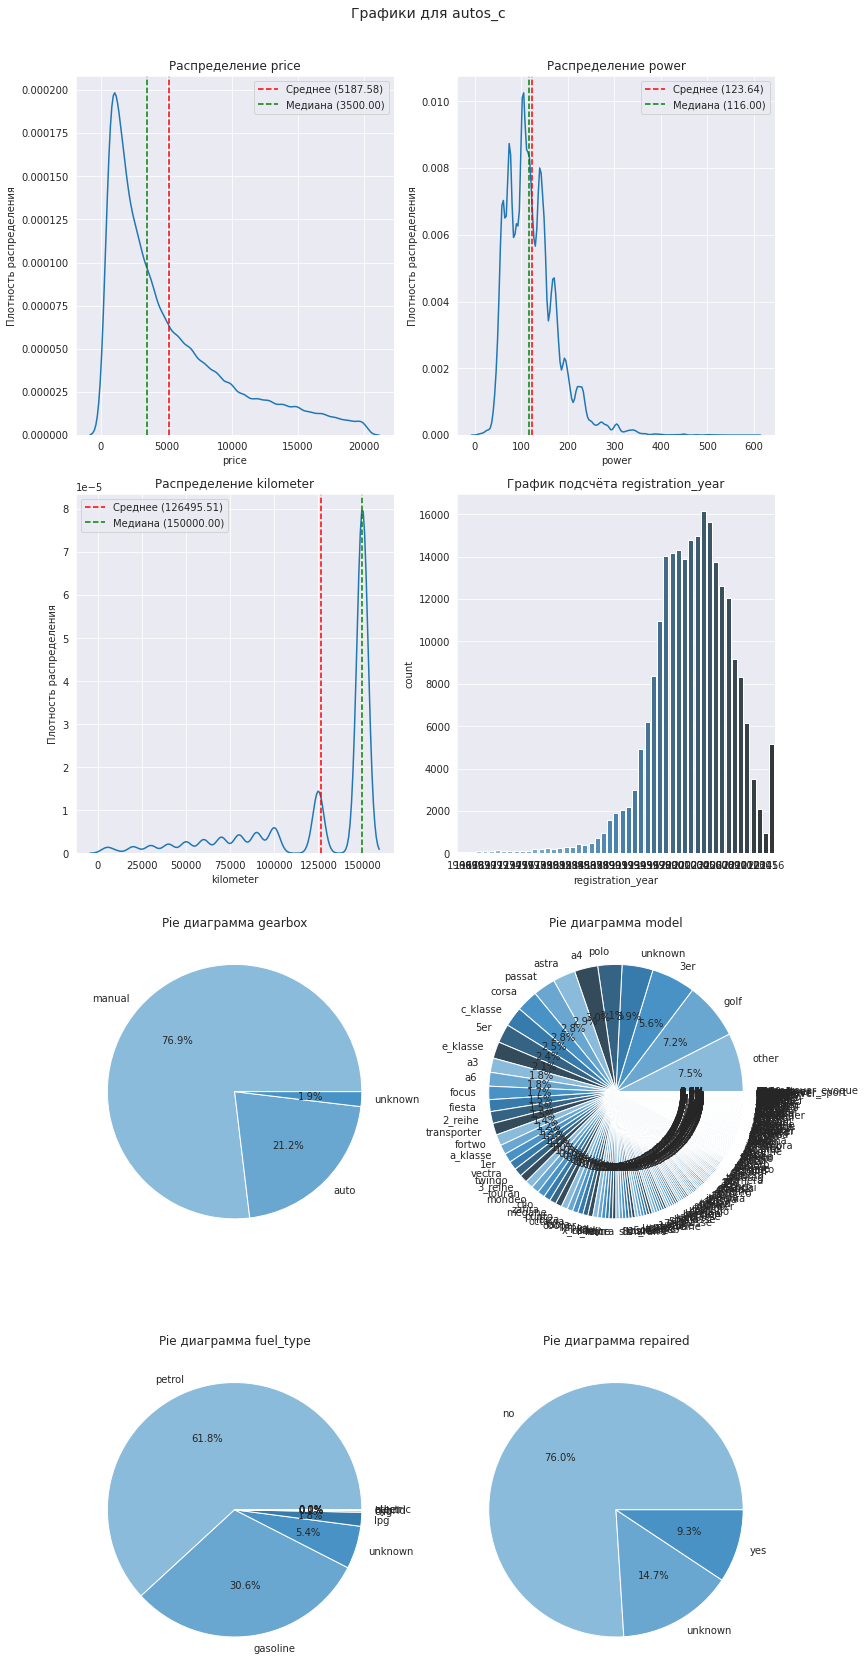

Описательная статистика для признаков: autos_c


,count,mean,std,min,25%,50%,75%,max
price,238859.0,5187.582201,4670.791221,355.0,1520.0,3500.0,7500.0,20000.0
power,238859.0,123.637334,54.344921,6.0,83.0,116.0,150.0,601.0
kilometer,238859.0,126495.505717,37646.431425,5000.0,125000.0,150000.0,150000.0,150000.0
registration_year,238859.0,2003.168045,6.444203,1966.0,1999.0,2004.0,2008.0,2016.0


In [32]:
autos_c.name = 'autos_c'
info_func(autos_c, dis_columns)

* Датафрейм содержит 212 164 строки
* Пропущенные значения в столбцах отсутствуют:
* Явные и неявные дубликаты отсутствуют

Разобьём выборку на тренировочную и тестовую

In [33]:
# Разбиваем выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    autos_c.drop('price', axis=1),
    autos_c['price'],
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE)

## Обучение моделей

Обучим разные модели: LinearRegression, RandomForestRegressor, LightGBM, CatBoostRegressor. Для каждой модели попробуем разные гиперпараметры

Создадим список категориальных и числовых признаков

In [34]:
cat_columns = ['gearbox', 'model', 'fuel_type', 'repaired']
num_columns = ['registration_year', 'power', 'kilometer']

Создадим пайплайн для преобразования категориальных признаков в бинарные

In [35]:
ohe_pipe = Pipeline([
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

Создадим общий пайплайн для предобработки данных

In [36]:
data_preprocessor = ColumnTransformer([
    ('ohe', ohe_pipe, cat_columns),
    ('num', MinMaxScaler(), num_columns)
], remainder='passthrough')

Создадим итоговый пайплайн для линейных моделей

In [37]:
pipe_final_lin = Pipeline([
    ('preprocessor', data_preprocessor),
    ('model', LinearRegression())
])

Создадим итоговый пайплайн для деревьев

In [38]:
pipe_final_rf = Pipeline([
    ('preprocessor', data_preprocessor),
    ('model', RandomForestRegressor(random_state=RANDOM_STATE))
])

Создадим итоговый пайплайн для CatBoostRegressor

In [39]:
pipe_final_cb = Pipeline([
    ('preprocessor', data_preprocessor),
    ('model', CatBoostRegressor(random_state=RANDOM_STATE, verbose=False))
])

Создадим датафрейм для результатов

In [40]:
results = pd.DataFrame(columns=['Модель', 
                                'RMSE на кросс-валидации', 
#                                'RMSE на тестовой выборке', 
                                'Время обучения', 
                                'Время предсказания'])

### LinearRegression

Обучим и оценим модель для линейной регрессии

In [41]:
start_time = time.time()
scores = cross_val_score(
    pipe_final_lin,
    X_train,
    y_train,
    cv=5,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error'
)
cv_score_lin_reg = -scores.mean()
train_time_lin = time.time() - start_time
print('RMSE на кросс-валидации:', cv_score_lin_reg)
print(f'Время обучения: {train_time_lin:.2f} с.')

start_time = time.time()
pipe_final_lin.fit(X_train, y_train)
y_pred_lin_reg = pipe_final_lin.predict(X_test)
#rmse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg, squared=False)
pred_time_lin = time.time() - start_time
#print('RMSE на тестовой выборке:', rmse_lin_reg)
print(f'Время предсказания: {pred_time_lin:.2f} с.\n')

# Добавим результаты в датафрейм
results = results.append({
    'Модель': 'LinearRegression',
    'RMSE на кросс-валидации': cv_score_lin_reg,
#    'RMSE на тестовой выборке': rmse_lin_reg,
    'Время обучения': train_time_lin,
    'Время предсказания': pred_time_lin
}, ignore_index=True)

RMSE на кросс-валидации: 2714.350749186119
Время обучения: 92.80 с.
Время предсказания: 22.50 с.



### RandomForestRegressor

Обучим и оценим модель для случайного леса

In [42]:
rf_params = {
    'model__n_estimators': range(25, 50, 5),
    'model__max_depth': [None] + [i for i in range(2, 7)],
    'model__min_samples_leaf': range(2, 20, 4)
}
rf = RandomizedSearchCV(
    pipe_final_rf,
    rf_params,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    n_iter=10,
    cv=5,
    verbose=5,
    random_state=RANDOM_STATE,
)

start_time = time.time()
rf.fit(X_train, y_train)
train_time_rf = time.time() - start_time

print('Лучшая модель: \n', rf.best_estimator_)
print('RMSE на кросс-валидации', -rf.best_score_)
print(f'Время обучения: {train_time_rf:.2f} с.')
start_time = time.time()
y_pred_rf = rf.best_estimator_.predict(X_test)
#rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
pred_time_rf = time.time() - start_time
#print('RMSE на тестовой выборке:', rmse_rf)
print(f'Время предсказания: {pred_time_rf:.2f} с.\n')

# Добавим результаты в датафрейм
results = results.append({
    'Модель': 'RandomForestRegressor',
    'RMSE на кросс-валидации': -rf.best_score_,
#    'RMSE на тестовой выборке': rmse_rf,
    'Время обучения': train_time_rf,
    'Время предсказания': pred_time_rf
}, ignore_index=True)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END model__max_depth=3, model__min_samples_leaf=18, model__n_estimators=40;, score=-3029.402 total time=  23.1s
[CV 2/5] END model__max_depth=3, model__min_samples_leaf=18, model__n_estimators=40;, score=-3029.162 total time=  21.8s
[CV 3/5] END model__max_depth=3, model__min_samples_leaf=18, model__n_estimators=40;, score=-3005.797 total time=  21.9s
[CV 4/5] END model__max_depth=3, model__min_samples_leaf=18, model__n_estimators=40;, score=-2996.990 total time=  22.0s
[CV 5/5] END model__max_depth=3, model__min_samples_leaf=18, model__n_estimators=40;, score=-2987.052 total time=  22.7s
[CV 1/5] END model__max_depth=None, model__min_samples_leaf=14, model__n_estimators=40;, score=-1914.608 total time=  50.6s
[CV 2/5] END model__max_depth=None, model__min_samples_leaf=14, model__n_estimators=40;, score=-1929.537 total time=  49.8s
[CV 3/5] END model__max_depth=None, model__min_samples_leaf=14, model__n_estimators=40

### LightGBM

Обучим и оценим модель для LightGBM

In [43]:
lgbm_pipe = Pipeline([
    ('preprocessor', data_preprocessor),
    ('model', LGBMRegressor(random_state=RANDOM_STATE, verbose=-1))
])

lgbm_params = {
    'model__n_estimators': range(5, 55, 10),
    'model__max_depth': [None] + [i for i in range(2, 7)],
    'model__num_leaves': range(2, 40, 4)
}

lgbm_reg = RandomizedSearchCV(
    lgbm_pipe,
    lgbm_params,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    n_iter=10,
    cv=5,
    verbose=5,
    random_state=RANDOM_STATE,
)

start_time = time.time()
lgbm_reg.fit(X_train, y_train)
train_time_lgbm = time.time() - start_time

print('Лучшая модель: \n', lgbm_reg.best_estimator_)
print('RMSE на кросс-валидации', -lgbm_reg.best_score_)
print(f'Время обучения: {train_time_lgbm:.2f} с.')
start_time = time.time()
y_pred_lgbm = lgbm_reg.best_estimator_.predict(X_test)
#rmse_lgbm = mean_squared_error(y_test, y_pred_lgbm, squared=False)
pred_time_lgbm = time.time() - start_time
#print('RMSE на тестовой выборке:', rmse_lgbm)
print(f'Время предсказания: {pred_time_lgbm:.2f} с.\n')

# Добавим результаты в датафрейм
results = results.append({
    'Модель': 'LightGBM',
    'RMSE на кросс-валидации': -lgbm_reg.best_score_,
#    'RMSE на тестовой выборке': rmse_lgbm,
    'Время обучения': train_time_lgbm,
    'Время предсказания': pred_time_lgbm
}, ignore_index=True)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END model__max_depth=5, model__n_estimators=5, model__num_leaves=14;, score=-3482.442 total time=   3.4s
[CV 2/5] END model__max_depth=5, model__n_estimators=5, model__num_leaves=14;, score=-3487.016 total time=   3.9s
[CV 3/5] END model__max_depth=5, model__n_estimators=5, model__num_leaves=14;, score=-3479.673 total time=   2.5s
[CV 4/5] END model__max_depth=5, model__n_estimators=5, model__num_leaves=14;, score=-3478.480 total time=   3.7s
[CV 5/5] END model__max_depth=5, model__n_estimators=5, model__num_leaves=14;, score=-3455.242 total time=   4.3s
[CV 1/5] END model__max_depth=6, model__n_estimators=15, model__num_leaves=26;, score=-2395.721 total time=   7.5s
[CV 2/5] END model__max_depth=6, model__n_estimators=15, model__num_leaves=26;, score=-2406.400 total time=   4.5s
[CV 3/5] END model__max_depth=6, model__n_estimators=15, model__num_leaves=26;, score=-2375.062 total time=   7.8s
[CV 4/5] END model__max_

### CatBoostRegressor

Обучим и оценим модель для CatBoost

In [44]:
start_time = time.time()
scores = cross_val_score(
    pipe_final_cb,
    X_train,
    y_train,
    cv=5,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error'
)
cv_score_catboost = -scores.mean()
train_time_catboost = time.time() - start_time
print('RMSE на кросс-валидации:', cv_score_catboost)
print(f'Время обучения: {train_time_catboost:.2f} с.')

start_time = time.time()
pipe_final_cb.fit(X_train, y_train)
y_pred_catboost = pipe_final_cb.predict(X_test)
#rmse_catboost = mean_squared_error(y_test, y_pred_catboost, squared=False)
pred_time_catboost = time.time() - start_time
#print('RMSE на тестовой выборке:', rmse_catboost)
print(f'Время предсказания: {pred_time_catboost:.2f} с.\n')

# Добавим результаты в датафрейм
results = results.append({
    'Модель': 'CatBoost',
    'RMSE на кросс-валидации': cv_score_catboost,
#    'RMSE на тестовой выборке': rmse_catboost,
    'Время обучения': train_time_catboost,
    'Время предсказания': pred_time_catboost
}, ignore_index=True)

RMSE на кросс-валидации: 1735.2337178802234
Время обучения: 140.23 с.
Время предсказания: 36.09 с.



## Анализ моделей

Отобразим результаты всех моделей

In [45]:
results

,Модель,RMSE на кросс-валидации,Время обучения,Время предсказания
0,LinearRegression,2714.350749,92.803133,22.498117
1,RandomForestRegressor,1903.012025,1335.815796,0.780813
2,LightGBM,2077.151783,429.372666,0.593450
3,CatBoost,1735.233718,140.228203,36.092547


**Анализ:**
* Качество предсказания (RMSE):

  * CatBoost продолжает показывать наилучший результат (RMSE: 1735.23).
  * RandomForestRegressor занимает второе место (RMSE: 1903.01).
  * LightGBM на третьем месте (RMSE: 2077.15).
  * LinearRegression показывает худшее качество (RMSE: 2714.35).

* Время обучения:

  * LinearRegression снова имеет самое короткое время обучения (92.80 секунд).
  * CatBoost быстро обучается по сравнению с RandomForestRegressor и LightGBM (140.23 секунд).
  * LightGBM (429.37 секунд) и RandomForestRegressor (1335.82 секунд) обучаются дольше.

* Время предсказания:

  * LightGBM имеет наивысшую скорость предсказания (0.59 секунд).
  * RandomForestRegressor также показывает хорошую скорость предсказания (0.78 секунд).
  * LinearRegression (22.50 секунд) и CatBoost (36.09 секунд) значительно медленнее.

**Выбор наилучшей модели:**

* CatBoost имеет лучшее качество предсказания, но долго предсказывает.
* LightGBM имеет высокую скорость предсказания и среднее качество предсказания.
* RandomForestRegressor имеет хорошее качество предсказания, но долго обучается.
* LinearRegression быстро обучается, но имеет худшее качество предсказания.

**Рекомендация:**

CatBoost остается наилучшей моделью по качеству предсказания. LightGBM может быть альтернативой, если важна высокая скорость предсказания.

**Проверка качества на тестовой выборке:**

Проверим качество выбранной модели CatBoost на тестовой выборке:

In [48]:
rmse_catboost = mean_squared_error(y_test, y_pred_catboost, squared=False)
print(f'RMSE на тестовой выборке: {rmse_catboost:.0f}')

RMSE на тестовой выборке: 1697


**Заключение**

На основе результатов видно, что CatBoost остается предпочтительной моделью для достижения максимального качества предсказаний, несмотря на несколько более длительное время предсказания по сравнению с другими моделями.